In [1]:
#Backend People start here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import STL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-07-17,35.220716,35.712980,35.161550,35.395847,95174000,0.0,0.0
2017-07-18,35.310642,35.530744,35.185209,35.518909,71475200,0.0,0.0
2017-07-19,35.613573,35.836040,35.488140,35.741375,83692000,0.0,0.0
2017-07-20,35.854990,35.911791,35.544957,35.580456,68974800,0.0,0.0
2017-07-21,35.497611,35.604110,35.234911,35.563877,105010400,0.0,0.0


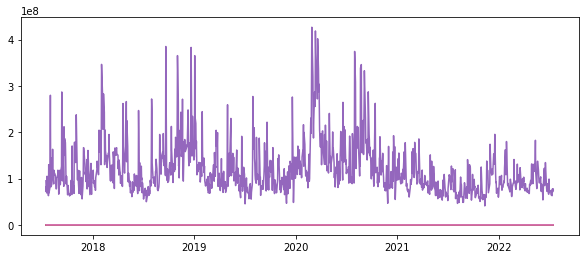

In [2]:
data = yf.Ticker("AAPL").history(period=str('5y'))

plt.figure(figsize=(10,4))
plt.plot(data)
data.head()

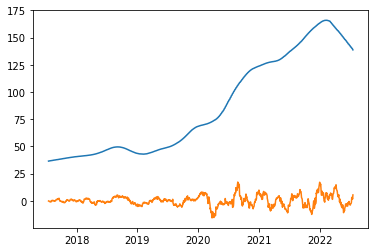

In [5]:
hiLowAvg = data
hiLowAvg['Average Price'] = (hiLowAvg['High'] + hiLowAvg['Low'])/2
hiLowAvg = hiLowAvg.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
hiLowAvg.head()

stl = STL(hiLowAvg, period = 100)
result = stl.fit()

trend, seasonal, residual = result.trend, result.seasonal, result.resid

plt.plot(trend)
plt.plot(residual)

In [9]:
print(trend)

[ 36.46168137  36.4981727   36.53464506 ... 139.33667442 139.02766725
 138.7181827 ]
